# Risk with the rank-Dependent utility :

### Import des bibiliothéques

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import*
from mip import Model, xsum, maximize, BINARY
from mip import *

### Définir la classe Loterie

In [4]:
class Loterie:
    def __init__(self, loterie):
        # Initialisation de l'objet Loterie avec une liste de résultats probables
        self.loterie = loterie
        self.validate_loterie()  # Validation de la structure de la loterie
        self.sort_loterie()      # Tri des éléments de la loterie

    def validate_loterie(self):
        # Vérifie que chaque élément de la loterie est une liste [xi, pi]
        if not all(isinstance(i, list) and len(i) == 2 for i in self.loterie):
            raise ValueError("Chaque élément de la loterie doit être une liste de la forme [xi, pi].")
        
        # Vérifie que la somme des probabilités pi est égale à 1
        if not np.isclose(sum(p for _, p in self.loterie), 1.0):
            raise ValueError("La somme des probabilités doit être égale à 1.")
        
    def sort_loterie(self):
        # Trie la loterie par les valeurs xi en ordre décroissant
        self.loterie.sort(key=lambda x: x[0], reverse=True)

    def calculer_RDU(self, w, u):
        
        n = len(self.loterie)
        prob_cumulee = np.zeros(n)  # Initialisation du tableau des probabilités cumulées
        V = 0.0  # Initialisation de la valeur RDU

        # Calcul des probabilités cumulées
        for i in range(n):
            if i == 0:
                prob_cumulee[i] = self.loterie[i][1]
            else:
                prob_cumulee[i] = prob_cumulee[i - 1] + self.loterie[i][1]

        # Calcul de la valeur RDU en utilisant les probabilités cumulées et les différences d'utilité
        for i in range(n - 1):
            delta_u = u(self.loterie[i][0]) - u(self.loterie[i + 1][0])
            V += w(prob_cumulee[i]) * delta_u

        # Ajouter la dernière contribution du dernier gain
        V += w(prob_cumulee[-1]) * u(self.loterie[-1][0])

        return V

### Classe Loterie:
Cette classe représente une loterie composée de différentes issues, chacune ayant une récompense et une probabilité associée. La classe fournit des méthodes pour valider, trier et calculer une valeur pondérée de la loterie en utilisant des fonctions spécifiques.

#### Méthodes

###### __init__(self, loterie)

- Constructeur de la classe.
- Paramètre : loterie (list) - Une liste de listes où chaque sous-liste est de la forme [xi, pi], avec xi représentant la récompense et pi la probabilité associée.
- Actions :
  * Initialise l'attribut loterie avec la liste fournie.
  * Appelle la méthode validate_loterie pour valider la loterie.
   * Appelle la méthode sort_loterie pour trier la loterie par les récompenses xi en ordre décroissant.
 
###### validate_loterie(self)
- Valide la structure de la loterie.
- Actions :
  * Vérifie que chaque élément de loterie est une liste de la forme [xi, pi].
  * Vérifie que la somme des probabilités pi est égale à 1.
- Lève une ValueError si l'une des conditions n'est pas remplie.

##### sort_loterie(self)

- Trie la loterie par les récompenses xi en ordre décroissant.
- Actions :
  * Utilise la méthode sort avec un lambda fonction pour trier les éléments de loterie en ordre décroissant basé sur les valeurs de xi.
  
##### calculate_V(self, w, u)

- Calcule la valeur pondérée de la loterie en utilisant des fonctions de pondération et d'utilité.
- Paramètres :
  * w (function) - Fonction de pondération des probabilités cumulées.
  * u (function) - Fonction d'utilité pour les récompenses.
- Retourne : La valeur pondérée calculée.
- Actions :
  * Calcule les probabilités cumulées pour chaque issue de la loterie.
  * Utilise la fonction de pondération w et la fonction d'utilité u pour calculer la somme pondérée des différences d'utilité entre chaque issue consécutive.

#### Test de la classe Loterie (loterie valide):

In [5]:
loterie_valide = [[500, 0.5], [300, 0.3], [200, 0.2]]

# créer une instance de loterie:
try:
    l = Loterie(loterie_valide)
    print("Loterie valide créée avec succès.")
except ValueError as e:
    print(f"Erreur : {e}")
    
#Affichage de la loterie triée:
print("Loterie triée :", l.loterie)

# fonction de pondération w et fonction d'utilité u:
def w(p):
    return (p**0.5) / (p**0.5 + (1-p)**0.5)

def u(x):
    return sqrt(x)

#calculer la valeur de la loterie:
valeur_loterie = l.calculer_RDU(w,u)
print("la valeur de la loterie l sous RDU :", valeur_loterie)

Loterie valide créée avec succès.
Loterie triée : [[500, 0.5], [300, 0.3], [200, 0.2]]
la valeur de la loterie l sous RDU : 18.781136441357397


In [6]:
print(l.calculer_RDU(lambda x:x, lambda x:x)) 

380.0


#### Test de la classe Loterie(loterie invalide):

In [8]:
#Tester une loterie invalide (probabilités ne sommant pas 1):
loterie_invalide_1 = [[500, 0.5], [300, 0.3], [200, 0.3]]
try:
    l_invalide = Loterie(loterie_invalide_1)
    print("Loterie invalide créée avec succées.")
except ValueError as e:
    print(f"Erreur (probabilités) : {e}")
    

#Tester une loterie invalide (format):
loterie_invalide_2 = [[500, 0.5], [300, 0.3, 0.1], [200, 0.2]]
try:
    l_invalide = Loterie(loterie_invalide_2)
    print("Loterie invalide créée avec succées.")
except ValueError as e:
    print(f"Erreur (format) : {e}")
    
#Tester une loterie non triée:
loterie_non_triée = [[200, 0.2], [500, 0.5], [300, 0.3]]
try:
    l = Loterie(loterie_non_triée)
    print("Loterie créée avec succées.")
    print("Loterie triée :", l.loterie)
except ValueError as e:
        print(f"Erreur : {e}") 

Erreur (probabilités) : La somme des probabilités doit être égale à 1.
Erreur (format) : Chaque élément de la loterie doit être une liste de la forme [xi, pi].
Loterie créée avec succées.
Loterie triée : [[500, 0.5], [300, 0.3], [200, 0.2]]


In [9]:
def u(x):
    return sqrt(x)

In [10]:
def V(loterie, w, u):
    return loterie.calculer_RDU(w, u)

#### Évalue la valeur d'une loterie sous le modèle RDU.

    Attributs:
    - loterie : Instance de Loterie.
    - w : Fonction de pondération des probabilités.
    - u : Fonction d'utilité.

    Returns:
    - Valeur calculée de la loterie.

### Dominance stochastique

In [11]:
# Calculate the cumulative distribution function (CDF)
def cumulative_distribution_function(lottery):
    lottery_sorted = sorted(lottery, key=lambda x: x[0])
    values, probabilities = zip(*lottery_sorted)
    cdf = np.cumsum(probabilities)
    return values, cdf

In [12]:
def stochastic_dominance(lottery1, lottery2):
    
    try:
        l1 = Loterie(lottery1)
        print("Loterie créée avec succées.")
    except ValueError as e:
        print(f"Erreur (probabilités) : {e}")
        
    try:
        l2 = Loterie(lottery2)
        print("Loterie créée avec succées.")
    except ValueError as e:
        print(f"Erreur (probabilités) : {e}")
    
    values1, cdf1 = cumulative_distribution_function(lottery1)
    values2, cdf2 = cumulative_distribution_function(lottery2)
    
    # Get all unique values from both lotteries
    all_values = np.unique(np.concatenate([values1, values2]))
    
    # Interpolating CDFs to have values at the same points
    cdf1_interp = np.interp(all_values, values1, cdf1, left=0, right=1)
    cdf2_interp = np.interp(all_values, values2, cdf2, left=0, right=1)
    
    # Check for stochastic dominance
    if np.all(cdf1_interp <= cdf2_interp):
        return True
    return False

#### Fonction cumulative_distribution_function
##### Description :
Cette fonction calcule la fonction de distribution cumulée (FDC) pour une loterie donnée sous la forme {[𝑥1,𝑝1],…,[𝑥𝑛,𝑝𝑛]}, où 𝑥𝑖 sont les résultats et 𝑝𝑖 sont les probabilités correspondantes.
##### Arguments :
- lottery (list of lists) : Une loterie sous la forme {[𝑥1,𝑝1],…,[𝑥𝑛,𝑝𝑛]}, où 𝑥𝑖 sont les résultats et 𝑝𝑖 sont les probabilités.
###### Renvoie : 
- tuple : Deux listes, l'une pour les résultats triés et l'autre pour les probabilités cumulées.

#### Fonction stochastic_dominance
##### Description :
Cette fonction vérifie si lottery1 domine stochastiquement lottery2.
##### Arguments :
- lottery1 (list of lists) : Une loterie sous la forme {[𝑥1,𝑝1],…,[𝑥𝑛,𝑝𝑛]}, où 𝑥𝑖 sont les résultats et 𝑝𝑖 sont les probabilités.
- lottery2(list of lists) : Une loterie sous la forme {[𝑥1,𝑝1],…,[𝑥𝑛,𝑝𝑛]}, où 𝑥𝑖 sont les résultats et 𝑝𝑖 sont les probabilités.
##### Renvoie :
- bool : True si lottery1 domine stochastiquement lottery2, False sinon.

##### Exemple pour la dominance stochastique

In [13]:
# Example:

lottery1 = [[1, 0.2], [2, 0.2], [3, 0.2], [4, 0.2], [5, 0.2]]
lottery2 = [[2, 0.2], [3, 0.2], [4, 0.2], [5, 0.2], [6, 0.2]]

if stochastic_dominance(lottery1, lottery2):
    print("Lottery 1 stochastically dominates Lottery 2")
else:
    print("Lottery 1 does not stochastically dominate Lottery 2")

Loterie créée avec succées.
Loterie créée avec succées.
Lottery 1 does not stochastically dominate Lottery 2


### Minimisation du reget avec I-splines en utilisant MIP

#### Définir la fonction M_splines : 
* M-splines : Les M-splines sont des fonctions polynomiales par morceaux qui servent de base pour créer des courbes complexes en les combinant linéairement. Ces splines sont définies par des segments sur un intervalle donné et sont utiles pour approcher des formes complexes dans les régressions non linéaires. Chaque M-spline est nulle en dehors de son intervalle défini, ce qui les rend localisées et faciles à manipuler. 

In [14]:
# Definition of the M-spline function based on recursive construction
def M_spline(x, i, k, t):
    if k == 1:
        # Base case: M-spline of order 1
        if t[i] <= x < t[i + 1]:
            return 1 / (t[i + 1] - t[i])
        else:
            return 0
    else:
        # Recursive calculation of M-spline of order k
        res1 = (x - t[i]) / (t[i + k] - t[i]) * M_spline(x, i, k - 1, t) if t[i + k] > t[i] else 0
        res2 = (t[i + k] - x) / (t[i + k] - t[i]) * M_spline(x, i + 1, k - 1, t) if t[i + k] > t[i] else 0
        return k * (res1 + res2) / (k - 1)

#### m_spline(x, k, t, i):

##### Description : 
- Calcul de la valeur de la M-spline d'ordre k au point x.
##### Arguments :
- x (float) : Le point auquel évaluer la M-spline.
- k (int) : L'ordre de la M-spline.
- t (list of float) : La liste des noeuds (knots).
- i (int) : L'index du noeud pour cette M-spline.
##### Retour : 
- La valeur de la M-spline au point x.

#### Définir la fonction I_splines :
*  Les I-splines sont des fonctions dérivées des M-splines. Elles sont obtenues en intégrant les M-splines, ce qui garantit que les I-splines sont non décroissantes. Cette propriété est cruciale lorsqu'on veut modéliser des fonctions qui doivent toujours augmenter ou rester constantes, comme les fonctions de pondération des probabilités utilisées dans la théorie des décisions sous risque.

In [15]:
def I_spline(x, i, k, t):
    j = 0
    for l in range(len(t)-1):
        if t[l]<= x and x < t[l+1]:
            j = l
            break;
    if i < j-k+1:
        return 1
    elif i>j:
        return 0
    else: 
        somme = 0
        for s in range(i,j+1):
            somme += (t[s+k+1]-t[s])*M_spline(x, s, k+1, t)
        return somme / (k+1) 

#### i_spline(x, k, t, i):
##### Description : 
- Calcul de la valeur de la I-spline d'ordre k au point x.
##### Arguments :
- x (float) : Le point auquel évaluer la I-spline.
- k (int) : L'ordre de la I-spline.
- t (list of float) : La liste des noeuds (knots).
- i (int) : L'index du noeud pour cette I-spline.
##### Retour : 
- La valeur de la I-spline au point x

#### Pourquoi utiliser les M-splines et I-splines ? 
* Les M-splines permettent de construire des fonctions qui ont des variations locales contrôlées, tandis que les I-splines sont utilisées lorsqu'il est nécessaire de créer des fonctions monotones (toujours croissantes). Dans le contexte de la théorie des décisions, les I-splines modélisent des comportements de pondération de probabilité qui reflètent l'attitude face au risque.

##### Exemple de plot des M_splines et I_splines

In [16]:
# Knot sequence as described in the document for order 3 splines
t = [0, 0, 0, 0, 1/3, 2/3, 1, 1, 1, 1]
x_vals = np.linspace(0, 1, 500)

# Calculating M-splines and I-splines for each index i
M_splines = [np.array([M_spline(x, i, 3, t) for x in x_vals]) for i in range(1, len(t) - 3)]
I_splines = [np.array([I_spline(x, i, 3, t) for x in x_vals]) for i in range(1, len(t) - 3)]

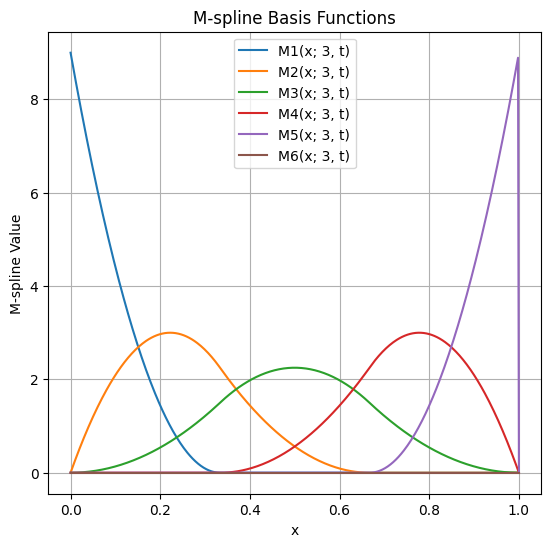

In [17]:
# Plotting M-splines
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for i, M in enumerate(M_splines):
    plt.plot(x_vals, M, label=f'M{i+1}(x; 3, t)')
plt.title('M-spline Basis Functions')
plt.xlabel('x')
plt.ylabel('M-spline Value')
plt.grid(True)
plt.legend()

* Les M-splines sont calculées à l'aide d'une formule récursive qui commence par des splines d'ordre 1 (simples segments) et les combine pour créer des splines d'ordre supérieur. Chaque M-spline est définie sur un intervalle limité par les nœuds de la séquence t.
* Le graphe ci-dessous montre les M-splines de différentes positions (i) sur la séquence de nœuds. Elles sont localisées et leur hauteur et largeur varient en fonction de leur position.

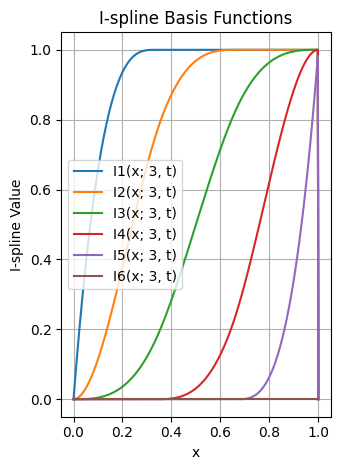

In [18]:
# Plotting I-splines
plt.subplot(1, 2, 2)
for i, I in enumerate(I_splines):
    plt.plot(x_vals, I, label=f'I{i+1}(x; 3, t)')
plt.title('I-spline Basis Functions')
plt.xlabel('x')
plt.ylabel('I-spline Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

* Les I-splines sont obtenues en intégrant les M-splines, ce qui garantit qu'elles sont toujours croissantes ou constantes. Cela les rend particulièrement utiles pour modéliser des fonctions de pondération des probabilités, qui doivent refléter un comportement cohérent et non décroissant face au risque.
* Le graphe ci-dessous montre les I-splines qui démarrent à zéro, augmentent progressivement et atteignent un maximum de 1. Chaque I-spline commence à zéro, augmente en fonction de la somme des contributions des M-splines sous-jacentes, et reste monotone croissante.

#### Calculer le vecteur v pour chaque loterie

In [28]:
def v(lottery,k,t,I_spline_functions,u):
    l = lottery.loterie
    n = len(l)
    m = len(I_spline_functions)
    
    v = np.zeros(m) #initialisation du vecteur v 
    
    #extract prob and outcomes from lottery
    prob = [p[1] for p in l]
    outcomes = [p[0] for p in l]
    
    #calculer les probabilités cumulées
    cum_prob = np.cumsum(prob)
    
    for j in range(m):
        for i in range (n-1):
            v[j] += I_spline_functions[j](cum_prob[i])*(u(outcomes[i]) - u(outcomes[i+1]))
        v[j] += I_spline_functions[j](cum_prob[-1])*(u(outcomes[-1]))
        
    return v

Cette fonction permet le calcul le vecteur v pour une loterie donnée en utilisant des fonctions I-splines et une fonction d'utilité.

La fonction calcule un vecteur `v` de taille `m`, où `m` est le nombre de fonctions I-splines fournies. 
Le vecteur `v` est calculé en prenant en compte les probabilités cumulées des issues de la loterie et les différences d'utilité entre les issues adjacentes.

##### Arguments:
   - lottery (list of tuples): Une liste de tuples représentant les lots de la loterie. Chaque tuple contient deux éléments :
   - outcome (float): Le résultat de la loterie.
   - prob (float): La probabilité associée à ce résultat.
   - k (float): Paramètre pour la fonction I-spline (peut être utilisé pour le calcul des splines).
   - t (float): Paramètre pour la fonction I-spline (peut être utilisé pour le calcul des splines).
   - u (function): Fonction d'utilité qui prend en entrée un résultat de la loterie et renvoie une valeur d'utilité.
   - I_spline_functions (list of functions): Liste de fonctions I-splines. Chaque fonction prend deux arguments (probabilité cumulée, index de la fonction) et renvoie un poids pour le calcul.

##### Retourne:
   - numpy.ndarray: Un vecteur `v` de taille `m`, où chaque élément correspond au résultat du calcul pour chaque fonction I-spline.

##### Comparaison entre la valeur d'une loterie en utilisant le modèle d'Utilité Dépendante du Rang (RDU) et la méthode basée sur les I-splines

* Définir la Loterie : La loterie est définie par une liste de paires [𝑥𝑖,𝑝𝑖], où 𝑥𝑖 représente un gain et 𝑝𝑖 sa probabilité associée.
* Calculer la Valeur RDU : Utiliser le modèle RDU qui combine une fonction de pondération des probabilités 𝑤 et une fonction d'utilité 𝑢. La valeur RDU reflète comment un décideur perçoit les probabilités et les gains.
* Calculer la Valeur en Utilisant les I-splines : Ici, on utilise les I-splines pour approximer la fonction de pondération 𝑤. Les I-splines sont des fonctions croissantes obtenues à partir des M-splines, et elles permettent de modéliser des pondérations plus complexes et réalistes.
* Comparer les Résultats : Calculer et comparer les valeurs obtenues par les deux méthodes pour montrer leurs différences.

In [20]:
# Définir la loterie comme une liste de paires [gain, probabilité]
loterie = [[10, 0.4], [20, 0.3], [30, 0.3]]
l = Loterie(loterie)

# Définir la fonction d'utilité, par exemple u(x) = sqrt(x)
def u(x):
    return np.sqrt(x)

# Séquence des nœuds pour les I-splines d'ordre 3
t = [0, 0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1, 1]

In [21]:
# Générer les I-splines en fonction des nœuds et de l'ordre des splines
I_splines = [lambda x: I_spline(x, i, 3, t) for i in range(1, len(t) - 3)]

# Ajuster les poids pour correspondre à une pondération linéaire
poids = [1/len(I_splines)] * len(I_splines)  # Poids équilibrés pour une somme proche de 1

In [22]:
# Définir la fonction de pondération w comme une somme pondérée des I-splines
def w_I_splines(x, poid, I_sp):
    return sum(p*sp(x) for p,sp in zip(poids,I_sp))

In [23]:
# Calculer la valeur en utilisant le modèle RDU traditionnel
valeur_RDU = V(l, lambda x: w_I_splines(x, poid=poids,I_sp=I_splines), u)
print(f"Valeur RDU de la loterie (Traditionnel) : {valeur_RDU}")

# Calculer la valeur en utilisant les I-splines pour la pondération
vec = v(l,k,t,I_splines,u)
valeur_I_splines = np.dot(vec,poids)
print(f"Valeur de la loterie utilisant les I-splines : {valeur_I_splines}")

# Comparaison des résultats
difference = valeur_I_splines - valeur_RDU
print(f"Différence entre la méthode I-spline et la RDU traditionnelle : {difference}")

Valeur RDU de la loterie (Traditionnel) : 0.0
Valeur de la loterie utilisant les I-splines : 0.0
Différence entre la méthode I-spline et la RDU traditionnelle : 0.0


Fonction de Pondération :

* Pour la méthode RDU traditionnelle, nous utilisons une fonction simple de pondération w(x)=x, sans distorsion des probabilités, ce qui signifie que le décideur traite les probabilités de manière objective.
* Pour la méthode basée sur les I-splines, 𝑤(𝑥) est calculée comme une somme pondérée des I-splines, qui permet d'approximer une distorsion plus réaliste et complexe des probabilités, souvent observée chez les décideurs.

Calcul des Valeurs RDU :

* La fonction calculer_V calcule la valeur de la loterie en utilisant la méthode RDU. Elle utilise les probabilités cumulées des résultats de la loterie et applique la fonction de pondération aux différences d'utilité entre les résultats successifs.

Comparaison des Résultats :

* Le code affiche la valeur de la loterie calculée par les deux méthodes et la différence entre elles. Cela permet de voir comment l'utilisation des I-splines modifie la perception de la valeur de la loterie par rapport à une évaluation traditionnelle.

##### Interprétation des Résultats :
* Valeur RDU : Montre comment un décideur évaluerait la loterie en utilisant une pondération linéaire des probabilités, sans distorsion.
* Valeur I-splines : Reflète une évaluation qui tient compte de la distorsion des probabilités via les I-splines, qui peuvent modéliser des comportements plus réalistes face au risque.
* Différence : Indique l'effet de l'utilisation des I-splines sur l'évaluation de la loterie, montrant comment la perception du risque et des probabilités change avec une pondération plus complexe. 
La différence négative indique que la valeur de la loterie est perçue comme moins favorable lorsque les probabilités sont pondérées par les I-splines comparativement à une pondération linéaire (sans distorsion).
Cette diminution reflète un comportement décisionnel où le décideur pourrait être plus prudent ou pessimiste en raison de la distorsion des probabilités introduite par les I-splines.

* Perception du Risque : La méthode basée sur les I-splines suggère que le décideur évalue les probabilités de manière non linéaire, ce qui correspond souvent à des attitudes face au risque. Par exemple, il est courant que les décideurs surestiment les petites probabilités de gains (optimisme) et sous-estiment les grandes probabilités (pessimisme), ce qui peut diminuer la valeur perçue d'une loterie.

* Impact des Pondérations : Dans le modèle RDU traditionnel, les probabilités sont traitées de manière objective, sans altération, tandis que les I-splines modifient cette perception. Cela entraîne une réévaluation des chances de gains, souvent conduisant à une réduction de la valeur totale de la loterie lorsque la distorsion pénalise les gains.

### Probléme d'optimisation

Résoudre le problème de minimisation du regret avec les I-splines en utilisant la bibliothèque mip.

In [29]:
def solve_regret_minimization(lotteries, k, t, I_spline_functions, u):

    # Calculer les v-composantes pour chaque loterie
    v_components_list = [v(lottery, k, t, I_spline_functions, u) for lottery in lotteries]

    # Créer un nouveau modèle MIP (Programmation Linéaire Mixte)
    model = Model(sense=maximize, solver_name='CBC')

    # Définir les variables (vecteur de lambdas)
    m = len(I_spline_functions)
    lambda_vars = [model.add_var(var_type='C', lb=0) for _ in range(m)]

    # Définir la fonction objectif
    objective_terms = []
    for i in range(len(lotteries)):
        for j in range(i + 1, len(lotteries)):
            # Calculer la différence des v-composantes entre deux loteries
            v_diff = np.array(v_components_list[j]) - np.array(v_components_list[i])
            # Ajouter la somme pondérée des lambdas à la fonction objectif
            objective_terms.append(xsum(lambda_vars[l] * v_diff[l] for l in range(m)))

    # Maximiser la somme des termes objectifs
    model.objective = xsum(objective_terms)

    # Ajouter les contraintes pour que la somme pondérée soit non-négative pour chaque paire de loteries
    for i in range(len(lotteries)):
        for j in range(i + 1, len(lotteries)):
            v_plus = v_components_list[i]
            v_minus = v_components_list[j]
            model += xsum(lambda_vars[l] * (v_plus[l] - v_minus[l]) for l in range(m)) >= 0

    # Résoudre le modèle
    model.optimize()

    # Extraire les valeurs optimales de lambda et la valeur optimale de la fonction objectif
    lambda_values = [lambda_vars[j].x for j in range(m)]
    optimal_value = model.objective_value

    return lambda_values, optimal_value

##### Paramètres :
* lotteries (liste de listes) : Une liste de loteries, où chaque loterie est représentée par une liste de tuples (résultat, probabilité).
* k (int) : Le degré des I-splines.
* t (liste de flottants) : Le vecteur de nœuds pour les I-splines.
* I_spline_functions (liste de fonctions) : Une liste de fonctions I-splines.
* utility (fonction) : Une fonction d’utilité qui prend un résultat en entrée et renvoie son utilité.

##### Étapes :
* Calculer les v-composantes pour chaque loterie.
* Configurer un nouveau modèle MIP en utilisant la bibliothèque mip.
* Définir les variables lambda.
* Construire la fonction objectif pour maximiser la somme pondérée des différences dans les v-composantes pour tous les paires de loteries.
* Ajouter des contraintes pour s’assurer que la somme pondérée des différences dans les v-composantes est non négative pour chaque paire de loteries.
* Résoudre le modèle.
* Extraire les valeurs optimales de lambda et la valeur optimale de la fonction objectif.

##### Retourne :
* un tuple contenant :
* une liste des valeurs optimales de lambda.
* un flottant : la valeur optimale de la fonction objectif.

#### Exemple pour ce probléme d'optimisation

In [30]:
# Example usage
lotteries = [
    [(100, 0.2), (200, 0.5), (300, 0.3)],  # Lottery 1
    [(150, 0.4), (250, 0.6)]  # Lottery 2
]

k = 3
t = [0, 0, 0, 1/3, 2/3, 1, 1, 1]
I_spline_functions = [lambda p, j=j, k=k, t=t: I_spline_function(p, j, k, t) for j in range(5)]  # Example I-spline functions
utility_function = lambda x: x  # Example utility function (linear)

lambda_values, optimal_value = solve_regret_minimization(lotteries, k, t, I_spline_functions, utility_function)
print("Optimal lambda values:", lambda_values)
print("Optimal objective value (max regret):", optimal_value)

IndexError: list index out of range

##### Simuler une requête de préférence de l'utilisateur entre deux loteries

In [31]:
def Query(lottery1, lottery2):
    return np.random.choice([lottery1, lottery2])

#### Regret-based elicitation procedure

Procédure d'élucidation basée sur le regret pour trouver la loterie optimale

In [32]:
def regret_based_elicitation(lotteries, P, epsilon, k, t, I_spline_functions, u, lambda_values):
    # Initialisation de l'algorithme
    
    # Calcul des fonctions de pondération W à partir des valeurs lambda et des I-splines
    W = [lambda p: np.dot(lambda_values, [I_spline(p, j, k, t) for j in range(len(lambda_values))])]
    
    # Trouver la loterie optimale actuelle, celle qui minimise le regret maximum parmi les autres loteries
    optimal_lottery = min(lotteries, key=lambda l: MR(l, lotteries, W))
    
    # Trouver la loterie "adversaire", celle qui maximise le regret par rapport à la loterie optimale
    adversary_lottery = max(lotteries, key=lambda l: PMR(optimal_lottery, l, W))
    
    # Calculer le regret maximal (MMR) pour la loterie optimale actuelle
    regret = MMR(W, lotteries)
    
    # Initialiser le nombre de requêtes de préférence et stocker les regrets successifs
    num_queries = 0
    regrets = [regret]

    # Boucle principale de l'algorithme pour minimiser le regret
    while regret > epsilon:
        # Simuler une requête pour obtenir la préférence de l'utilisateur entre la loterie optimale et l'adversaire
        preference = Query(optimal_lottery, adversary_lottery)
        
        # Retirer la loterie moins préférée des deux de la liste des loteries restantes
        lotteries.remove(min(optimal_lottery, adversary_lottery, key=lambda l: V(l, W[0])))
        
        # Ajouter la préférence obtenue à l'ensemble P
        P.append(preference)
        
        # Recalculer le regret maximal (MMR) après la mise à jour des préférences
        regret = MMR(W, lotteries)
        regrets.append(regret)
        
        # Recalculer la loterie optimale et la loterie adversaire
        optimal_lottery = min(lotteries, key=lambda l: MR(l, lotteries, W))
        adversary_lottery = max(lotteries, key=lambda l: PMR(optimal_lottery, l, W))
        
        # Incrémenter le nombre de requêtes de préférence
        num_queries += 1

    # Retourner la loterie optimale trouvée, la liste des regrets et le nombre de requêtes
    return optimal_lottery, regrets, num_queries


##### Paramètres :

* lotteries : Liste des loteries parmi lesquelles choisir.
* P : Liste des préférences enregistrées.
* epsilon : Seuil de regret à atteindre pour arrêter l'algorithme.
* k, t, I_spline_functions, u : Paramètres liés aux fonctions I-splines et à la fonction d'utilité.

##### Fonctionnement :

* solve_regret_minimization est utilisée pour calculer les lambdas optimaux.
* W est une approximation pondérée des fonctions I-splines.
* L'algorithme itère jusqu'à ce que le regret soit inférieur à epsilon.

##### Retour :

* La loterie optimale, la progression du regret, et le nombre de requêtes.

### Exemple classique :

In [33]:
def calculate_V(lottery, w, u):
    n = len(lottery)
    somme = 0.0
    prob_cum = np.zeros(n)

    for i in range(n):
        if i == 0:
            prob_cum[i] = lottery[i][1]
        else:
            prob_cum[i] = prob_cum[i-1] + lottery[i][1]

    for i in range(n - 1):
        somme += w(prob_cum[i]) * (u(lottery[i][0]) - u(lottery[i + 1][0]))

    return somme

def PMR(lottery1, lottery2, W):
    return max([calculate_V(lottery2, w, u) - calculate_V(lottery1, w, u) for w in W])

In [34]:
# Exemples de loteries
loteries = [
    [[100, 0.4],[200, 0.6]],  # Loterie 1
    [[150, 0.5], [250, 0.5]],  # Loterie 2
    [[120, 0.3], [220, 0.7]]   # Loterie 3
]

# Paramètres pour les I-splines
k = 3  # Degré des splines
t = [0, 0, 0, 1/3, 2/3, 1, 1, 1]  # Positions des nœuds

# Fonction d'utilité linéaire
u = lambda x: x

# Génération des fonctions I-splines
I_spline_functions = [lambda p, j=j, k=k, t=t: I_spline_function(p, j, k, t) for j in range(len(t) - k - 1)]

# Résolution du problème de minimisation du regret pour obtenir les lambdas optimaux
lambda_values, optimal_value = solve_regret_minimization(loteries, k, t, I_spline_functions, u)

# Exécution de l'algorithme d'élicitation basé sur le regret
epsilon = 0.01  # Seuil de regret acceptable
optimal_lottery, regrets, num_queries = regret_based_elicitation(loteries, [], epsilon, k, t, I_spline_functions, u, lambda_values)

# Affichage des résultats
print("Loterie optimale :", optimal_lottery)
print("Liste des regrets au fil des itérations :", regrets)
print("Nombre de requêtes de préférence :", num_queries)

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 28 2021 

Starting solution of the Linear programming problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 1 small elements
Coin0506I Presolve 0 (-3) rows, 0 (-4) columns and 0 (-11) elements
Clp0000I Optimal - objective value 0
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 0 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00


NameError: name 'MR' is not defined

### Exemple avec génération de loteries

In [35]:
# Generate lotteries with stochastic dominance check
def generate_lotteries(num_lotteries, num_branches):
    lotteries = []
    while len(lotteries) < num_lotteries:
        outcomes = np.random.uniform(0, 1000, num_branches)
        probabilities = np.random.dirichlet(np.ones(num_branches), size=1)[0]
        lottery = Loterie(list(zip(outcomes, probabilities)))
        if not any(stochastic_dominance(lottery, l) or stochastic_dominance(l, lottery) for l in lotteries):
            lotteries.append(lottery)
    return lotteries

##### Génère des loteries en vérifiant la dominance stochastique.

    Attributs:
    - num_lotteries : Nombre de loteries à générer.
    - num_branches : Nombre de branches (issues) dans chaque loterie.

    Returns:
    - lotteries : Liste d'instances de Loterie générées.

In [36]:
num_lotteries = 1000
num_branches = 5
lotteries = generate_lotteries(num_lotteries, num_branches)

# Paramètres pour les I-splines
k = 3  # Degré des splines
t = [0, 0, 0, 1/3, 2/3, 1, 1, 1]  # Positions des nœuds

# Fonction d'utilité linéaire
u = lambda x: x

# Génération des fonctions I-splines
I_spline_functions = [lambda p, j=j, k=k, t=t: I_spline_function(p, j, k, t) for j in range(len(t) - k - 1)]

# Résolution du problème de minimisation du regret pour obtenir les lambdas optimaux
lambda_values, optimal_value = solve_regret_minimization(loteries, k, t, I_spline_functions, u)

# Exécution de l'algorithme d'élicitation basé sur le regret
epsilon = 0.01  # Seuil de regret acceptable
optimal_lottery, regrets, num_queries = regret_based_elicitation(loteries, [], epsilon, k, t, I_spline_functions, u, lambda_values)

# Plotting the results
plt.plot(regrets, label="Max Regret Reduction", color='green')
plt.xlabel("Number of Queries")
plt.ylabel("Regret")
plt.title("Regret Reduction Over Queries")
plt.legend()
plt.grid(True)
plt.show()

ValueError: Chaque élément de la loterie doit être une liste de la forme [xi, pi].